#### Estadísticas Descriptivas

In [27]:
# Importo librerias

import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Importo archivo .CSV

df = pd.read_csv("player_valuations.csv")

##### Exploracion inicial 

In [29]:
df

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
...,...,...,...,...,...
464777,1073997,2024-01-08,150000,18,L1
464778,361508,2024-01-10,300000,39,L1
464779,705337,2024-01-10,125000,26459,UKR1
464780,800946,2024-01-10,1000000,79,L1


In [30]:
# Cambio el nombre de la columna 'market_value_in_eur' a 'precio_en_euros'

df.rename(columns={'market_value_in_eur': 'precio_en_euros'}, inplace=True)

In [31]:
# Ordeno el DF por valores de la columna 'precio_en_euros'

df_sorted = df.sort_values(by='precio_en_euros', ascending=False)
df_sorted

,player_id,date,precio_en_euros,current_club_id,player_club_domestic_competition_id
292158,342229,2019-12-19,200000000,583,FR1
268400,342229,2019-06-03,200000000,583,FR1
252371,342229,2018-12-17,200000000,583,FR1
443838,418560,2023-06-20,180000000,281,GB1
328329,342229,2020-10-15,180000000,583,FR1
...,...,...,...,...,...
456637,221815,2023-10-25,10000,1429,IT1
458037,55869,2023-12-04,10000,6676,GR1
458031,19987,2023-12-04,10000,2672,GR1
388267,621282,2022-02-01,10000,1005,IT1


##### Estadisticas Descriptivas: Resumen Estadistico Basico

In [32]:
# Configurar el formato de visualizacion para mostrar numeros completos
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.describe()

,player_id,precio_en_euros,current_club_id
count,464782.000,464782.000,464782.000
mean,204484.605,2359657.620,4060.930
std,186128.543,6666213.585,9516.104
min,10.000,0.000,3.000
25%,56841.000,200000.000,369.000
50%,149526.000,500000.000,1010.000
75%,297772.000,1500000.000,2969.000
max,1186012.000,200000000.000,83678.000


In [33]:
# Funciones basicas para 'precio_en_eur'

df['precio_en_euros'].mean() 
df['precio_en_euros'].median()
df['precio_en_euros'].mode()

0    300000
Name: precio_en_euros, dtype: int64

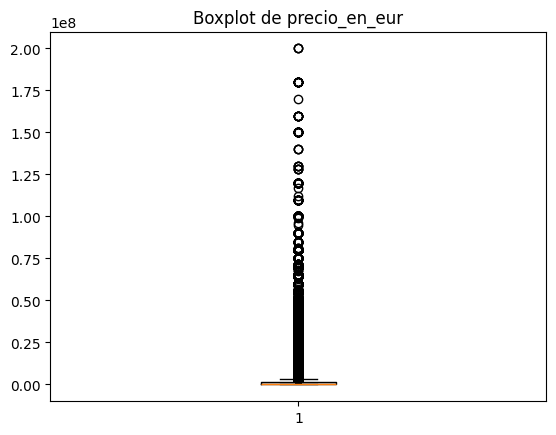

In [34]:
# Graficar algunas cosas.

# BoxPlot 
plt.boxplot(df['precio_en_euros'])
plt.title('Boxplot de precio_en_eur')
plt.show()

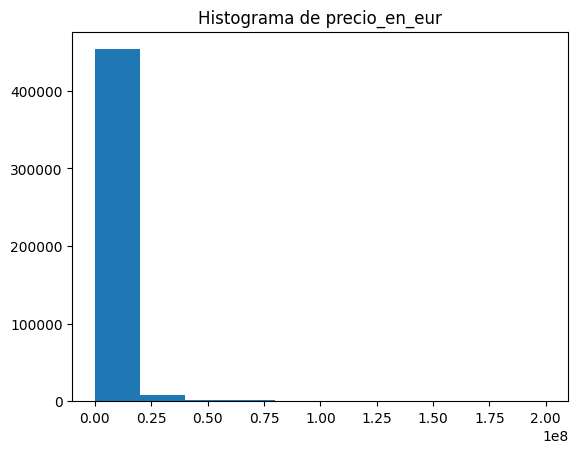

In [35]:
# Siguiendo..

# Histograma
plt.hist(df['precio_en_euros'])
plt.title('Histograma de precio_en_eur')
plt.show()

##### Limpieza de Datos utilizando IQR

Este proceso esta relacionado con la identificacion y tratamiento de outliers en un conjunto de datos.

- Q1 representa el Primer Cuartil, que es el valor por debajo del cual se encuentra el 25% de los datos
- Q3 representa el Tercer Cuartil, que es el valor por debajo de cual se encuentra el 75% de los datos

Se calcula el Rango Intercuartilico (IQR) que es la diferencia entre el Tercer Cuartil (Q3) y el Primer Cuartil (Q1) 
Se establece un limite superior y uno inferior para identificar valores atipicos.
- El limite inferior se calcula restando 1.5 veces el IQR a Q1: lower_bound = Q1 - 1.5*IQR
- El limite superior se calcula sumando 1.5 veces el IQR a Q3: upper_bound = Q3 + 1.5*IQR

In [36]:
# Calculo cuartiles
Q1 = df['precio_en_euros'].quantile(0.25)
Q3 = df['precio_en_euros'].quantile(0.75)
IQR = Q3 - Q1

# Defino limites
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Genero un DF que tenga el rango intercuartilico IQR
df_filtered = df[(df['precio_en_euros'] >= lower_bound) & (df['precio_en_euros'] <= upper_bound)]

In [37]:
df_filtered

,player_id,date,precio_en_euros,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
5,26,2004-10-04,1500000,16,L1
...,...,...,...,...,...
464777,1073997,2024-01-08,150000,18,L1
464778,361508,2024-01-10,300000,39,L1
464779,705337,2024-01-10,125000,26459,UKR1
464780,800946,2024-01-10,1000000,79,L1


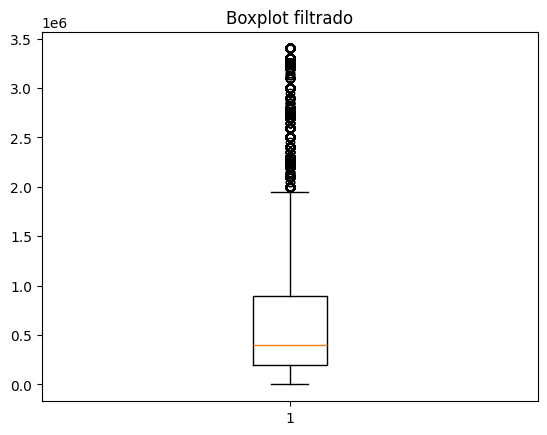

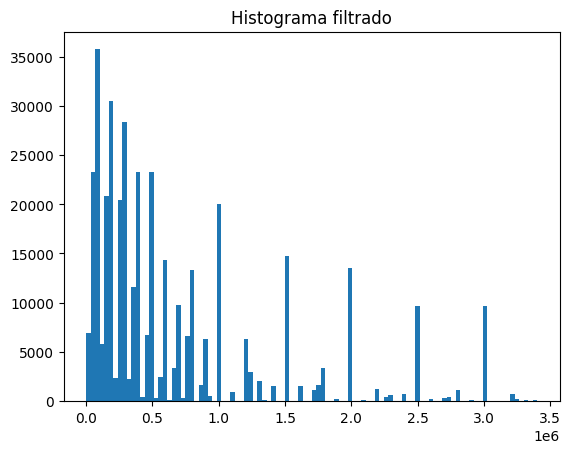

In [38]:
# Tiro nuevamente el BoxPlot y el Histograma

plt.boxplot(df_filtered['precio_en_euros'])
plt.title('Boxplot filtrado')
plt.show()

plt.hist(df_filtered['precio_en_euros'], bins=100)
plt.title('Histograma filtrado')
plt.show()

##### Medidas de Dispersion

In [42]:
# Rango
rango = df_filtered['precio_en_euros'].max() - df_filtered['precio_en_euros'].min()
rango

np.int64(3400000)

In [44]:
# Varianza
df_filtered['precio_en_euros'].var()

# Desvio tipico
df_filtered['precio_en_euros'].std()

np.float64(730373.144687121)

##### Medidas de Correlacion

In [46]:
# Creo un nuevo DF solo con variables numericas para calcular la correlacion
df_nuevo = df[['precio_en_euros', 'current_club_id']].copy()

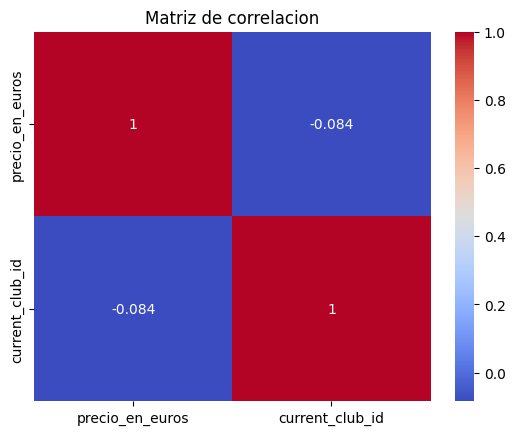

In [48]:
# Matriz de Correlacion
correlation_matrix = df_nuevo.corr()

# Visualizacion del heatmap con seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion')
plt.show()

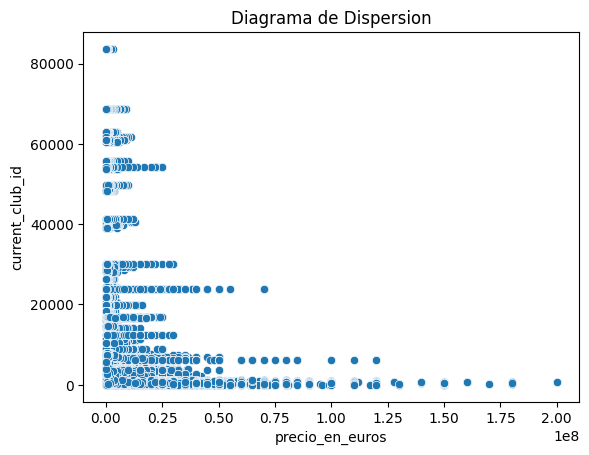

In [49]:
# Diagrama de Dispersion
sns.scatterplot(x='precio_en_euros', y='current_club_id', data=df_nuevo)
plt.title('Diagrama de Dispersion')
plt.show()